In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
# load data
def load_data(path):
    return pd.read_csv(path)
rice = load_data("/Users/liujuntao/Downloads/Rice_data_type.csv")
rice = rice.drop("Unnamed: 0", axis = 1)

# set b'Cammeo' to 0, b'Osmancik' to 1
label_encoder = LabelEncoder()
rice['Class'] = label_encoder.fit_transform(rice['Class'])
rice['Class'].value_counts()

1    2180
0    1630
Name: Class, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

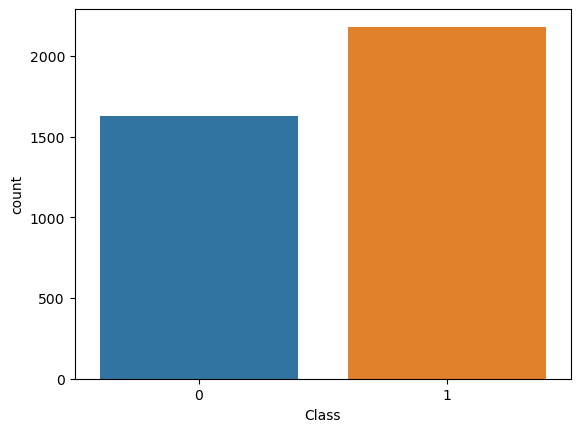

In [3]:
sns.countplot(x='Class', data=rice)

In [4]:
# get X and y
X = rice.drop('Class', axis = 1)
y = rice['Class']

In [5]:
# split train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)
print(y_train.value_counts())
print(y_test.value_counts())

1    1331
0     955
Name: Class, dtype: int64
1    849
0    675
Name: Class, dtype: int64


In [6]:
# scale the data
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

scaler = MinMaxScaler(feature_range=(0, 1))
X_train_mm = scaler.fit_transform(X_train)
X_test_mm = scaler.fit_transform(X_test)

# SVM 

In [7]:
# test default SVM on my data
clf = SVC()
clf.fit(X_train, y_train)
pred_y_svm = clf.predict(X_test)

In [8]:
# see the performance of default SVM
print(classification_report(y_test, pred_y_svm))
print(confusion_matrix(y_test, pred_y_svm))

              precision    recall  f1-score   support

           0       0.92      0.80      0.86       675
           1       0.86      0.94      0.90       849

    accuracy                           0.88      1524
   macro avg       0.89      0.87      0.88      1524
weighted avg       0.88      0.88      0.88      1524

[[542 133]
 [ 48 801]]


In [9]:
def plot_C_vs_error_weights(kf, X_train, X_test):
    C_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
    errors = []
    train_errors = []
    weights = []


    # Loop over different values of C
    for C_val in C_values:
        clf = SVC(kernel=kf, C=C_val)
        clf.fit(X_train, y_train)
        preds = clf.predict(X_test)
        validation_accuracy = accuracy_score(y_test, preds)
        print("C:", C_val)
        print(classification_report(y_test, preds))
        print(confusion_matrix(y_test, preds))
        preds_train = clf.predict(X_train)
        training_accuracy = accuracy_score(y_train, preds_train)
        print("training accuracy:", training_accuracy)
        print("test accuracy:", validation_accuracy, '\n')
        error = 1 - validation_accuracy
        train_error = 1 - training_accuracy
        errors.append(error)
        train_errors.append(train_error)
        if kf == 'linear':
            weights.append(clf.coef_)

    # Plotting error vs C
    plt.figure(figsize=(10, 5))
    plt.plot(C_values, errors, marker='o', color='green')
    plt.plot(C_values, train_errors, marker='o', color='red')
    plt.title(kf + ' kernel function: ' + 'Model Error vs. Regularization Parameter C')
    plt.xlabel('C value')
    plt.ylabel('Model error (1 - accuracy)')
    plt.xscale('log')
    plt.gca().legend(("validation","train loss"))

    plt.show()
    

    # Plotting feature weights for each C
    if kf == 'linear':
        weights_array = np.array(weights).reshape(len(C_values), -1)
        print(weights_array.shape)
        plt.figure(figsize=(15, 5))
        sns.heatmap(weights_array, annot=True, cmap='coolwarm', xticklabels=range(weights_array.shape[1]), yticklabels=C_values)
        plt.title(kf + ' kernel function: ' + 'Feature Weights vs. Regularization Parameter C')
        plt.xlabel('Feature index')
        plt.ylabel('C value')
        plt.show()

## Standard Normalizatoin

C: 0.0001
              precision    recall  f1-score   support

           0       0.99      0.62      0.77       675
           1       0.77      1.00      0.87       849

    accuracy                           0.83      1524
   macro avg       0.88      0.81      0.82      1524
weighted avg       0.87      0.83      0.82      1524

[[421 254]
 [  4 845]]
training accuracy: 0.84251968503937
test accuracy: 0.8307086614173228 

C: 0.001
              precision    recall  f1-score   support

           0       0.94      0.89      0.91       675
           1       0.91      0.96      0.94       849

    accuracy                           0.93      1524
   macro avg       0.93      0.92      0.93      1524
weighted avg       0.93      0.93      0.93      1524

[[598  77]
 [ 35 814]]
training accuracy: 0.9221347331583553
test accuracy: 0.926509186351706 

C: 0.01
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       675
           1       

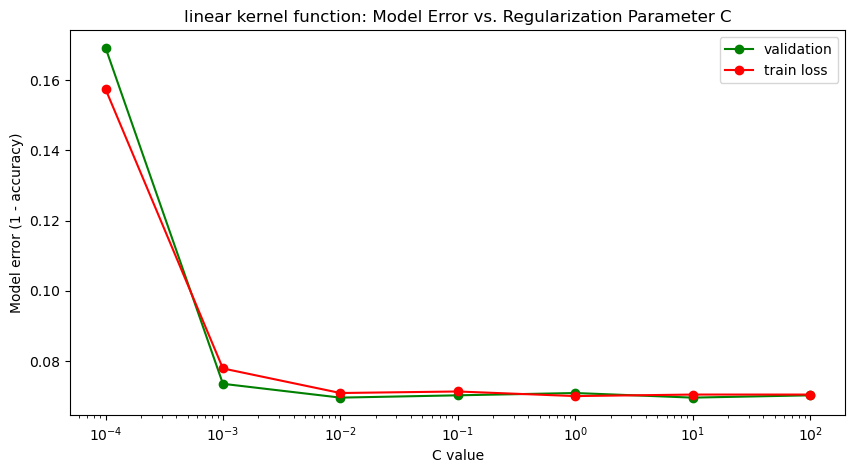

(7, 7)


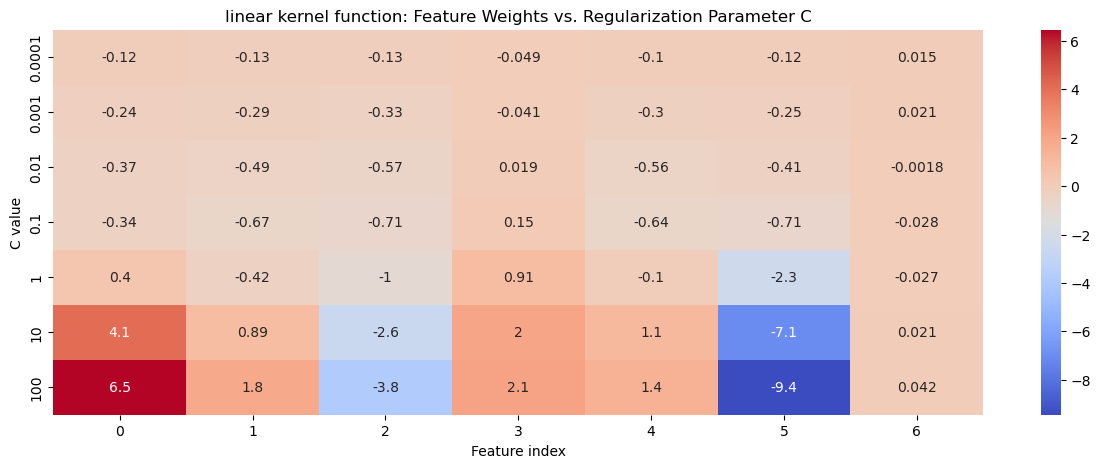

In [10]:
# linear kernal function
plot_C_vs_error_weights('linear', X_train_std, X_test_std)

C: 0.0001
              precision    recall  f1-score   support

           0       1.00      0.00      0.01       675
           1       0.56      1.00      0.72       849

    accuracy                           0.56      1524
   macro avg       0.78      0.50      0.36      1524
weighted avg       0.75      0.56      0.40      1524

[[  3 672]
 [  0 849]]
training accuracy: 0.5866141732283464
test accuracy: 0.5590551181102362 

C: 0.001
              precision    recall  f1-score   support

           0       1.00      0.29      0.45       675
           1       0.64      1.00      0.78       849

    accuracy                           0.69      1524
   macro avg       0.82      0.65      0.62      1524
weighted avg       0.80      0.69      0.64      1524

[[198 477]
 [  0 849]]
training accuracy: 0.7147856517935258
test accuracy: 0.687007874015748 

C: 0.01
              precision    recall  f1-score   support

           0       0.99      0.62      0.76       675
           1     

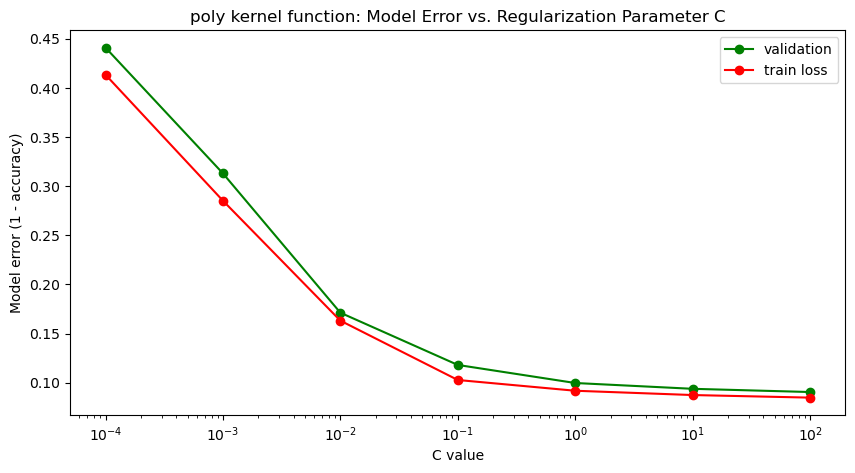

In [11]:
# polynomial kernel function
plot_C_vs_error_weights('poly', X_train_std, X_test_std)

C: 0.0001
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       675
           1       0.56      1.00      0.72       849

    accuracy                           0.56      1524
   macro avg       0.28      0.50      0.36      1524
weighted avg       0.31      0.56      0.40      1524

[[  0 675]
 [  0 849]]
training accuracy: 0.5822397200349956
test accuracy: 0.5570866141732284 



/Users/liujuntao/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/liujuntao/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/liujuntao/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C: 0.001
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       675
           1       0.56      1.00      0.72       849

    accuracy                           0.56      1524
   macro avg       0.28      0.50      0.36      1524
weighted avg       0.31      0.56      0.40      1524

[[  0 675]
 [  0 849]]
training accuracy: 0.5822397200349956
test accuracy: 0.5570866141732284 

C: 0.01


/Users/liujuntao/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/liujuntao/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/liujuntao/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.94      0.89      0.91       675
           1       0.91      0.96      0.94       849

    accuracy                           0.93      1524
   macro avg       0.93      0.92      0.93      1524
weighted avg       0.93      0.93      0.93      1524

[[599  76]
 [ 36 813]]
training accuracy: 0.9212598425196851
test accuracy: 0.926509186351706 

C: 0.1
              precision    recall  f1-score   support

           0       0.94      0.89      0.92       675
           1       0.92      0.96      0.94       849

    accuracy                           0.93      1524
   macro avg       0.93      0.92      0.93      1524
weighted avg       0.93      0.93      0.93      1524

[[602  73]
 [ 38 811]]
training accuracy: 0.9286964129483815
test accuracy: 0.9271653543307087 

C: 1
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       675
           1       0.92      0.9

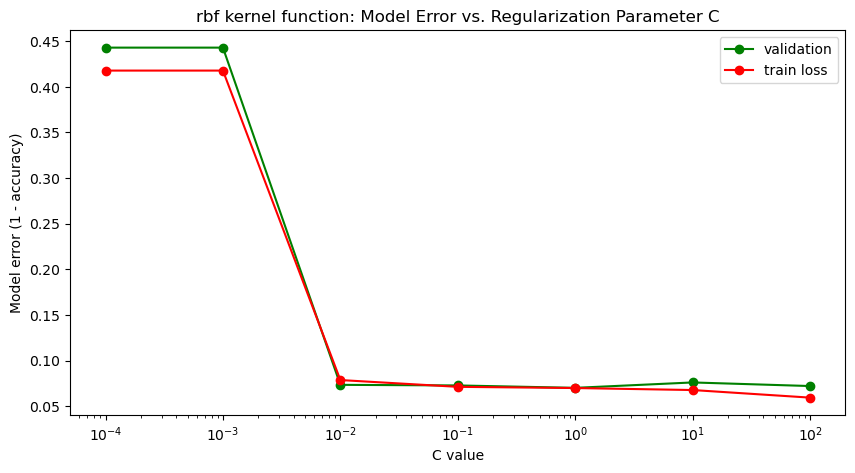

In [12]:
# radial-basis kernel function
plot_C_vs_error_weights('rbf', X_train_std, X_test_std)

## Min max normalization

C: 0.0001
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       675
           1       0.56      1.00      0.72       849

    accuracy                           0.56      1524
   macro avg       0.28      0.50      0.36      1524
weighted avg       0.31      0.56      0.40      1524

[[  0 675]
 [  0 849]]
training accuracy: 0.5822397200349956
test accuracy: 0.5570866141732284 

C: 0.001
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       675
           1       0.56      1.00      0.72       849

    accuracy                           0.56      1524
   macro avg       0.28      0.50      0.36      1524
weighted avg       0.31      0.56      0.40      1524

[[  0 675]
 [  0 849]]
training accuracy: 0.5822397200349956
test accuracy: 0.5570866141732284 

C: 0.01
              precision    recall  f1-score   support

           0       0.95      0.87      0.91       675
           1    

/Users/liujuntao/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/liujuntao/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/liujuntao/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/liujuntao

training accuracy: 0.9138232720909887
test accuracy: 0.9219160104986877 

C: 0.1
              precision    recall  f1-score   support

           0       0.94      0.89      0.91       675
           1       0.91      0.96      0.94       849

    accuracy                           0.93      1524
   macro avg       0.93      0.92      0.93      1524
weighted avg       0.93      0.93      0.93      1524

[[598  77]
 [ 35 814]]
training accuracy: 0.9225721784776902
test accuracy: 0.926509186351706 

C: 1
              precision    recall  f1-score   support

           0       0.95      0.88      0.91       675
           1       0.91      0.96      0.94       849

    accuracy                           0.93      1524
   macro avg       0.93      0.92      0.93      1524
weighted avg       0.93      0.93      0.93      1524

[[594  81]
 [ 30 819]]
training accuracy: 0.9278215223097113
test accuracy: 0.9271653543307087 

C: 10
              precision    recall  f1-score   support

      

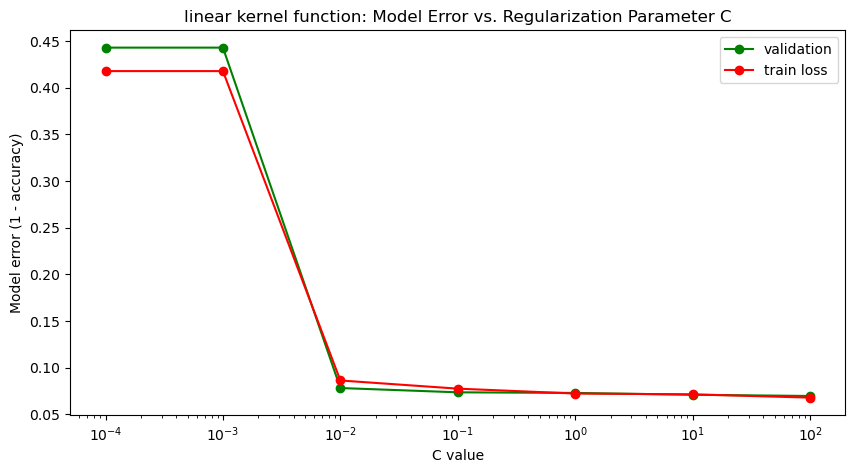

(7, 7)


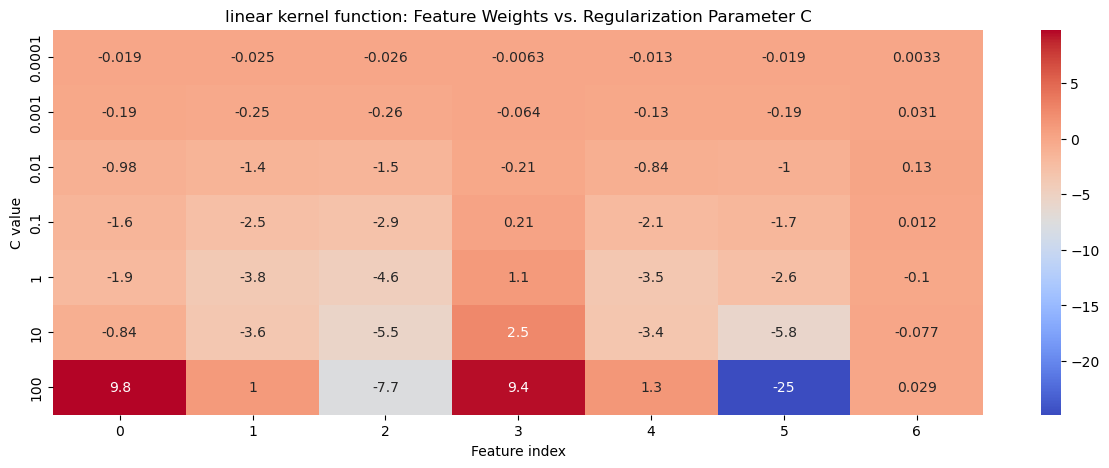

In [13]:
# linear kernel function
plot_C_vs_error_weights('linear', X_train_mm, X_test_mm)

C: 0.0001
              precision    recall  f1-score   support

           0       0.95      0.87      0.91       675
           1       0.90      0.97      0.93       849

    accuracy                           0.92      1524
   macro avg       0.93      0.92      0.92      1524
weighted avg       0.93      0.92      0.92      1524

[[586  89]
 [ 28 821]]
training accuracy: 0.9212598425196851
test accuracy: 0.9232283464566929 

C: 0.001
              precision    recall  f1-score   support

           0       0.96      0.87      0.91       675
           1       0.90      0.97      0.94       849

    accuracy                           0.93      1524
   macro avg       0.93      0.92      0.92      1524
weighted avg       0.93      0.93      0.93      1524

[[587  88]
 [ 25 824]]
training accuracy: 0.9282589676290464
test accuracy: 0.9258530183727034 

C: 0.01
              precision    recall  f1-score   support

           0       0.95      0.88      0.91       675
           1    

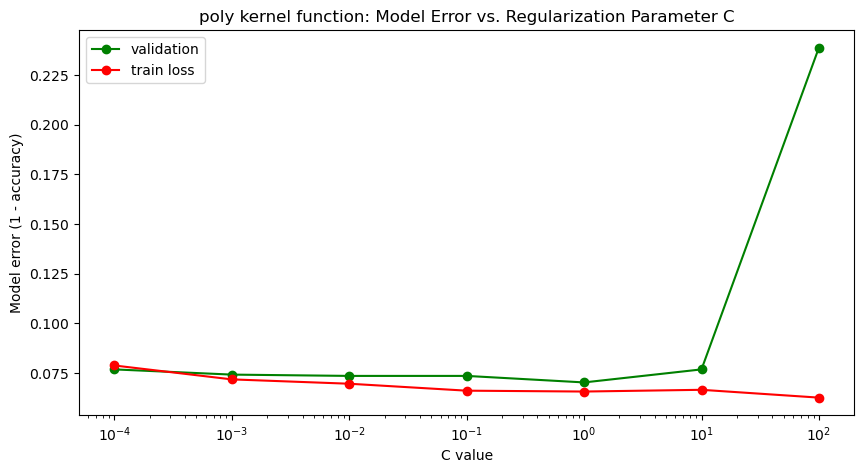

In [14]:
# polynomial kernel function
plot_C_vs_error_weights('poly', X_train_mm, X_test_mm)

C: 0.0001
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       675
           1       0.56      1.00      0.72       849

    accuracy                           0.56      1524
   macro avg       0.28      0.50      0.36      1524
weighted avg       0.31      0.56      0.40      1524

[[  0 675]
 [  0 849]]
training accuracy: 0.5822397200349956
test accuracy: 0.5570866141732284 



/Users/liujuntao/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/liujuntao/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/liujuntao/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C: 0.001
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       675
           1       0.56      1.00      0.72       849

    accuracy                           0.56      1524
   macro avg       0.28      0.50      0.36      1524
weighted avg       0.31      0.56      0.40      1524

[[  0 675]
 [  0 849]]
training accuracy: 0.5822397200349956
test accuracy: 0.5570866141732284 

C: 0.01
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       675
           1       0.92      0.95      0.94       849

    accuracy                           0.93      1524
   macro avg       0.93      0.92      0.93      1524
weighted avg       0.93      0.93      0.93      1524

[[606  69]
 [ 41 808]]


/Users/liujuntao/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/liujuntao/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/liujuntao/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


training accuracy: 0.9190726159230096
test accuracy: 0.9278215223097113 

C: 0.1
              precision    recall  f1-score   support

           0       0.94      0.89      0.91       675
           1       0.91      0.96      0.94       849

    accuracy                           0.93      1524
   macro avg       0.93      0.92      0.93      1524
weighted avg       0.93      0.93      0.93      1524

[[598  77]
 [ 35 814]]
training accuracy: 0.9273840769903762
test accuracy: 0.926509186351706 

C: 1
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       675
           1       0.92      0.96      0.94       849

    accuracy                           0.93      1524
   macro avg       0.93      0.92      0.93      1524
weighted avg       0.93      0.93      0.93      1524

[[600  75]
 [ 34 815]]
training accuracy: 0.9291338582677166
test accuracy: 0.928477690288714 

C: 10
              precision    recall  f1-score   support

       

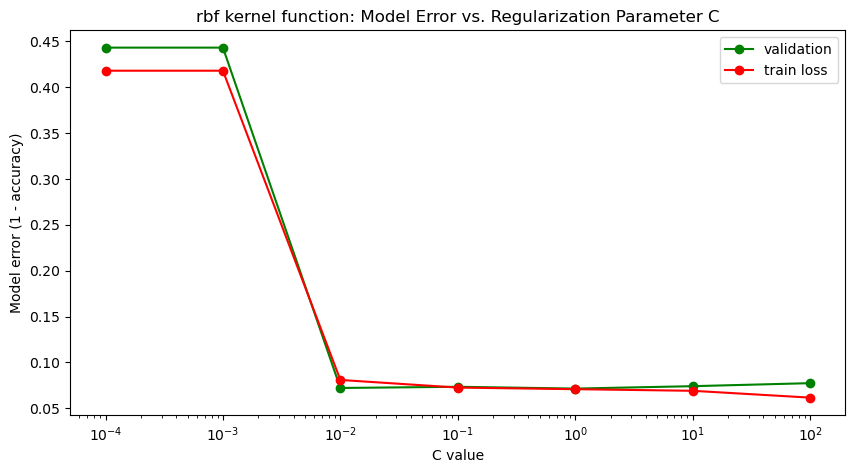

In [15]:
# radial-basis kernel function
plot_C_vs_error_weights('rbf', X_train_mm, X_test_mm)

# Neural Networks

In [16]:
def plot_nn_para_vs_error_weights(hidden_layer, X_train, X_test):
    max_iter = [250, 500, 750, 1000, 1500, 2000]
    errors = []
    train_errors = []
    
    w_all=[]
    for iter_val in max_iter:
        weights = []
        num_layer = len(hidden_layer) + 2
        mlpc = MLPClassifier(hidden_layer_sizes=hidden_layer, activation='relu', solver='adam', max_iter = iter_val)
        mlpc.fit(X_train, y_train)
        pred_train = mlpc.predict(X_train)
        pred_test = mlpc.predict(X_test)
        training_accuracy = accuracy_score(y_train, pred_train)
        validation_accuracy = accuracy_score(y_test, pred_test)
        print("max iteration:", iter_val)
        print(classification_report(y_test, pred_test))
        print(confusion_matrix(y_test, pred_test))
        print("training accuracy:", training_accuracy)
        print("test accuracy:", validation_accuracy, '\n')
        error = 1 - validation_accuracy
        train_error = 1 - training_accuracy
        errors.append(error)
        train_errors.append(train_error)
        for layer in range(1, num_layer):
            weights.append(mlpc.coefs_[layer-1].flatten())
        print(weights)
        w_all.append(weights)
    
    

    print(errors)
    
    # plot error
    plt.figure(figsize=(10, 5))
    plt.plot(max_iter, errors, marker='o', color='green')
    plt.plot(max_iter, train_errors, marker='o', color='red')
    plt.title('Model Error vs. Maximum Iteration')
    plt.xlabel('Maximum Iteration')
    plt.ylabel('Model error (1 - accuracy)')
    plt.gca().legend(("validation","train loss"))
    plt.show()
    
    return w_all
max_iter = [250, 500, 750, 1000, 1500, 2000]

## Standard Normalization

max iteration: 250
              precision    recall  f1-score   support

           0       0.94      0.89      0.92       675
           1       0.92      0.96      0.94       849

    accuracy                           0.93      1524
   macro avg       0.93      0.93      0.93      1524
weighted avg       0.93      0.93      0.93      1524

[[604  71]
 [ 37 812]]
training accuracy: 0.9273840769903762
test accuracy: 0.9291338582677166 

[array([ 5.99104780e-03, -3.92106746e-01,  4.26075223e-02,  6.55267661e-01,
       -5.23790196e-01, -3.36141584e-02,  2.12504134e-01, -8.17883510e-01,
       -6.03147711e-01, -5.87024575e-01,  3.49359724e-01, -4.87226899e-01,
        3.01894394e-04,  7.10002463e-01, -7.34731424e-01,  3.67771506e-01,
       -6.40112820e-01,  8.01741143e-01,  7.26304048e-02, -4.52943251e-01,
        8.81228606e-01,  2.06447914e-01, -4.42853419e-02, -6.58588880e-01,
       -7.55509570e-02, -3.25027303e-01,  5.27394988e-01,  4.10974587e-01,
       -4.56452492e-01, -4.4483

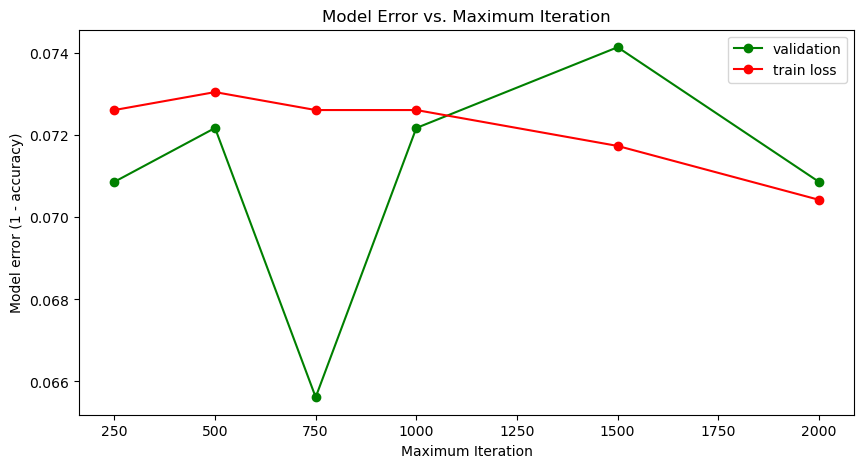

(6, 56)
(6, 56)


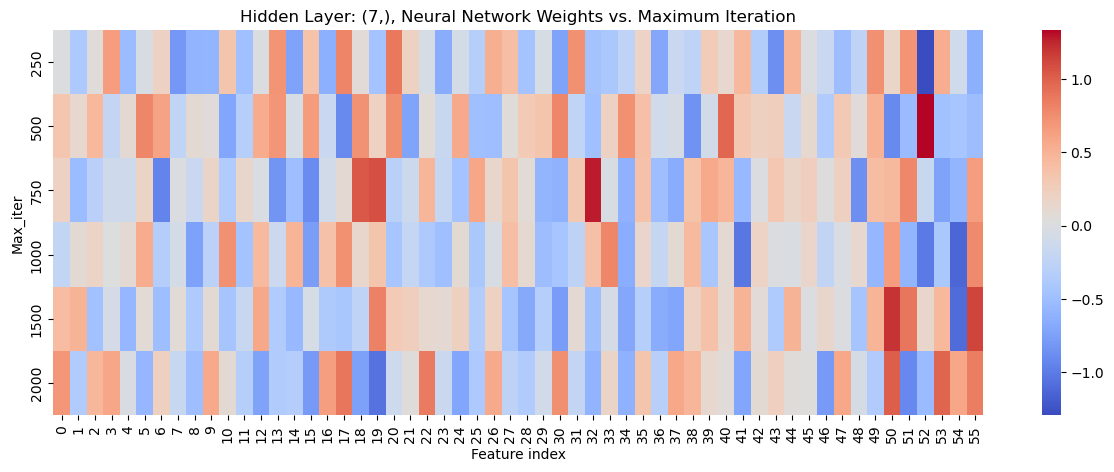

In [17]:
# hidden layer: (7,)
W_all = plot_nn_para_vs_error_weights((7,), X_train_std, X_test_std)
w=[]
for weight in W_all:
    w_iter = []
    for lst in weight:
        for i in lst:
            w_iter.append(i)
    w.append(np.array(w_iter))
weights_array = np.array(w)
print(weights_array.shape)
weights_array = weights_array.reshape(len(max_iter), -1)
print(weights_array.shape)
plt.figure(figsize=(15, 5))
sns.heatmap(weights_array, annot=False, cmap='coolwarm', xticklabels=range(weights_array.shape[1]), yticklabels=max_iter)
plt.title('Hidden Layer: (7,), Neural Network Weights vs. Maximum Iteration')
plt.xlabel('Feature index')
plt.ylabel('Max_iter')
plt.show()


In [ ]:
# hidden layer: (10,)
W_all = plot_nn_para_vs_error_weights((10,), X_train_std, X_test_std)
w=[]
for weight in W_all:
    w_iter = []
    for lst in weight:
        for i in lst:
            w_iter.append(i)
    w.append(np.array(w_iter))
weights_array = np.array(w)
print(weights_array.shape)
weights_array = weights_array.reshape(len(max_iter), -1)
print(weights_array.shape)
plt.figure(figsize=(15, 5))
sns.heatmap(weights_array, annot=False, cmap='coolwarm', xticklabels=range(weights_array.shape[1]), yticklabels=max_iter)
plt.title('Hidden Layer: (10,), Neural Network Weights vs. Maximum Iteration')
plt.xlabel('Feature index')
plt.ylabel('Max_iter')
plt.show()

max iteration: 250
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       675
           1       0.92      0.95      0.94       849

    accuracy                           0.93      1524
   macro avg       0.93      0.93      0.93      1524
weighted avg       0.93      0.93      0.93      1524

[[609  66]
 [ 39 810]]
training accuracy: 0.9321959755030621
test accuracy: 0.9311023622047244 

[array([ 0.10363323,  0.26974226,  0.76379765,  0.2785103 , -0.17235267,
        0.16579654,  0.11841624,  0.10130565, -0.24497396,  0.48060067,
        0.55940026, -0.56261337, -0.24921525, -0.42359333, -0.27432987,
       -0.09787842,  0.68422489,  0.28037489,  0.34863146, -0.44492798,
        0.26755361,  0.30507305,  0.57431505, -0.49884483,  0.64845561,
       -0.58537456,  0.58672808,  0.41543961,  0.33421273, -0.37342827,
       -0.21064195, -0.4647379 ,  0.5563876 ,  0.65916151, -0.12366175,
        0.47086517,  0.22551142, -0.47377288, -0.292

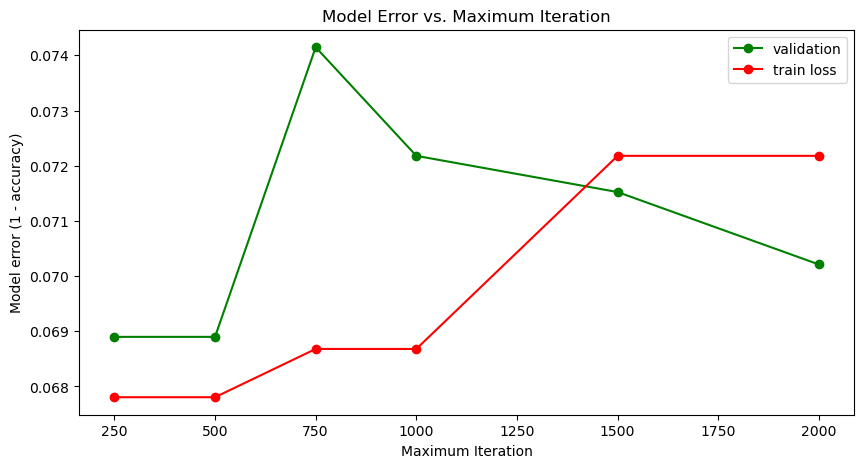

(6, 180)
(6, 180)


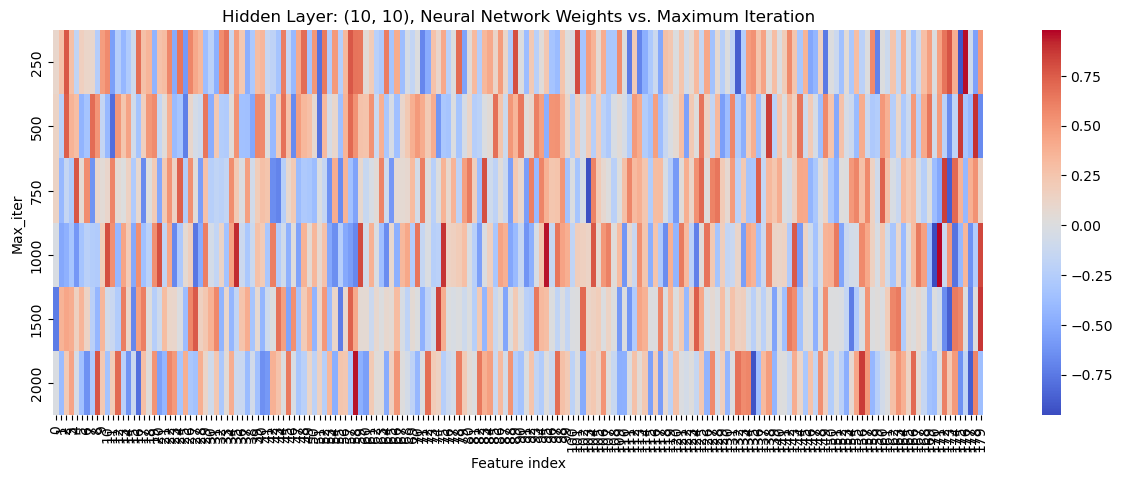

In [19]:
# hidden layer: (10, 10)
W_all = plot_nn_para_vs_error_weights((10, 10), X_train_std, X_test_std)
w=[]
for weight in W_all:
    w_iter = []
    for lst in weight:
        for i in lst:
            w_iter.append(i)
    w.append(np.array(w_iter))
weights_array = np.array(w)
print(weights_array.shape)
weights_array = weights_array.reshape(len(max_iter), -1)
print(weights_array.shape)
plt.figure(figsize=(15, 5))
sns.heatmap(weights_array, annot=False, cmap='coolwarm', xticklabels=range(weights_array.shape[1]), yticklabels=max_iter)
plt.title('Hidden Layer: (10, 10), Neural Network Weights vs. Maximum Iteration')
plt.xlabel('Feature index')
plt.ylabel('Max_iter')
plt.show()

## Minmax Normalization

max iteration: 250
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       675
           1       0.92      0.95      0.94       849

    accuracy                           0.93      1524
   macro avg       0.93      0.92      0.93      1524
weighted avg       0.93      0.93      0.93      1524

[[606  69]
 [ 42 807]]
training accuracy: 0.926071741032371
test accuracy: 0.9271653543307087 

[array([-0.45062801, -0.13434517,  0.31180878, -0.57000628, -0.56708766,
       -0.25665911, -0.02189511, -0.4785962 ,  0.9728273 ,  0.07668351,
       -0.13665242, -0.73110574,  0.2047193 ,  0.32009637, -0.19789122,
       -0.03511424,  0.60616332,  0.10143641, -0.60622959, -0.42674339,
        0.35855161, -0.02240749,  0.12451183,  0.04777202,  0.0349715 ,
        0.31320664, -0.34845052,  0.39953503, -0.82772855,  0.83560644,
        0.49664291,  0.1174322 , -1.0216754 , -0.31864429,  0.67722877,
       -0.56363779,  0.71947733,  0.44581888, -0.6655

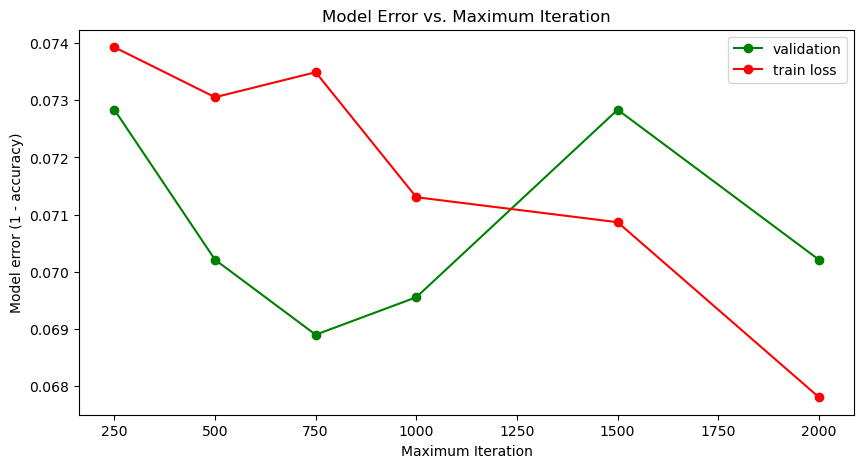

(6, 56)
(6, 56)


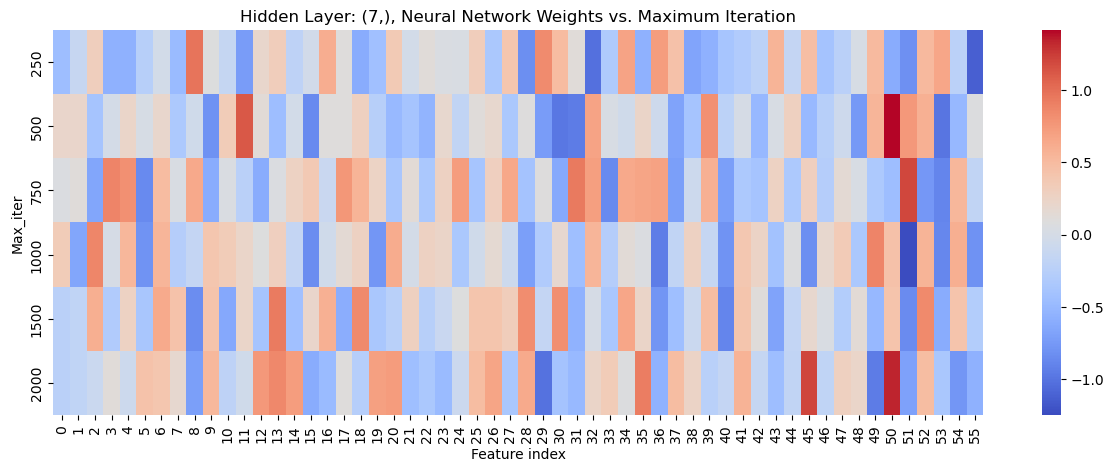

In [20]:
# hidden layer: (7,)
W_all = plot_nn_para_vs_error_weights((7,), X_train_std, X_test_std)
w=[]
for weight in W_all:
    w_iter = []
    for lst in weight:
        for i in lst:
            w_iter.append(i)
    w.append(np.array(w_iter))
weights_array = np.array(w)
print(weights_array.shape)
weights_array = weights_array.reshape(len(max_iter), -1)
print(weights_array.shape)
plt.figure(figsize=(15, 5))
sns.heatmap(weights_array, annot=False, cmap='coolwarm', xticklabels=range(weights_array.shape[1]), yticklabels=max_iter)
plt.title('Hidden Layer: (7,), Neural Network Weights vs. Maximum Iteration')
plt.xlabel('Feature index')
plt.ylabel('Max_iter')
plt.show()


max iteration: 250
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       675
           1       0.92      0.95      0.94       849

    accuracy                           0.93      1524
   macro avg       0.93      0.92      0.93      1524
weighted avg       0.93      0.93      0.93      1524

[[606  69]
 [ 42 807]]
training accuracy: 0.9282589676290464
test accuracy: 0.9271653543307087 

[array([-0.11366937,  1.02264572,  0.65667409, -0.09217372, -0.36369999,
       -0.69161368, -0.49650232, -0.19269785, -0.11854844, -0.2751105 ,
        0.7351459 ,  0.67645985,  0.83110623, -0.05512554,  0.66188477,
       -0.22682417,  0.38732259, -0.15843745,  0.65958264,  0.09073671,
        0.2998948 ,  0.92050444, -0.0305083 ,  0.12044268, -0.3417386 ,
       -0.90318403, -0.09266412,  0.24674631,  0.56334092, -0.8319639 ,
        0.22509325, -0.29564816,  0.45975398,  0.57888363, -0.2077425 ,
        0.60858696,  0.51669984, -0.03495129, -0.102

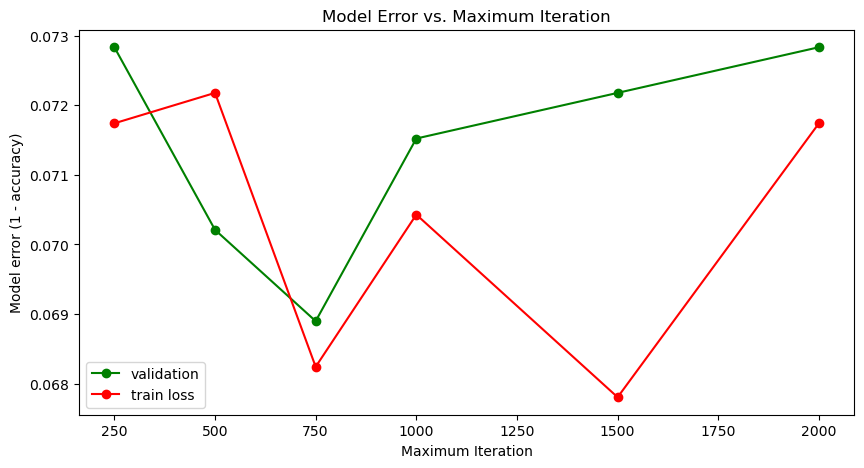

(6, 80)
(6, 80)


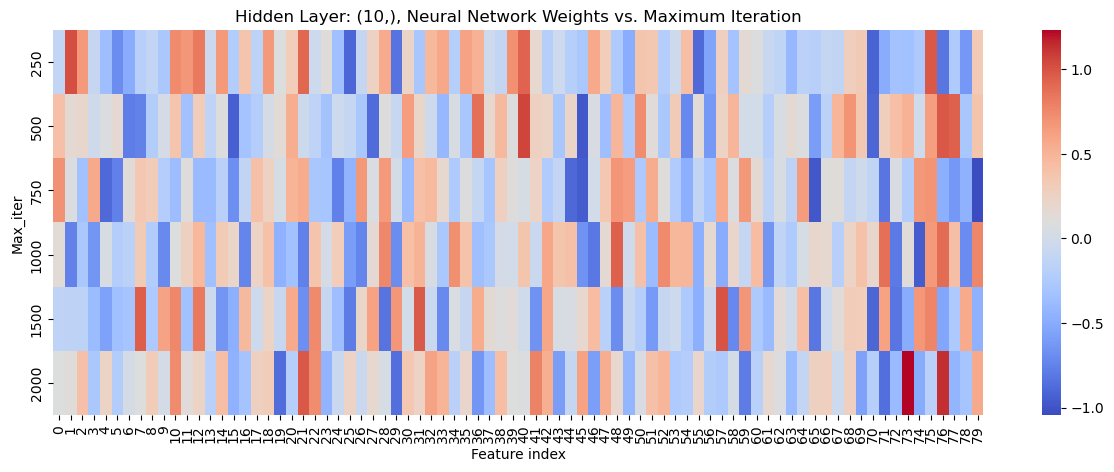

In [21]:
# hidden layer: (10,)
W_all = plot_nn_para_vs_error_weights((10,), X_train_std, X_test_std)
w=[]
for weight in W_all:
    w_iter = []
    for lst in weight:
        for i in lst:
            w_iter.append(i)
    w.append(np.array(w_iter))
weights_array = np.array(w)
print(weights_array.shape)
weights_array = weights_array.reshape(len(max_iter), -1)
print(weights_array.shape)
plt.figure(figsize=(15, 5))
sns.heatmap(weights_array, annot=False, cmap='coolwarm', xticklabels=range(weights_array.shape[1]), yticklabels=max_iter)
plt.title('Hidden Layer: (10,), Neural Network Weights vs. Maximum Iteration')
plt.xlabel('Feature index')
plt.ylabel('Max_iter')
plt.show()

max iteration: 250
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       675
           1       0.92      0.95      0.93       849

    accuracy                           0.93      1524
   macro avg       0.93      0.92      0.93      1524
weighted avg       0.93      0.93      0.93      1524

[[608  67]
 [ 45 804]]
training accuracy: 0.9321959755030621
test accuracy: 0.926509186351706 

[array([-0.22796495, -0.60132312, -0.22271879, -0.35179921, -0.42441849,
        0.22379932,  0.39202468, -0.09911371,  0.15054301,  0.39384394,
        0.16156439, -0.6222163 , -0.10629031, -0.06668972, -0.22697479,
       -0.24757654,  0.06113459, -0.81216883,  0.15881132, -0.44433508,
        0.76935059,  0.10386325,  0.47730015,  0.60801015,  0.57324839,
        0.37578105,  0.33257406, -0.01255607,  0.60350661, -0.15652563,
       -0.01172234,  0.27699083,  0.29916181, -0.41100223,  0.38525344,
        0.23330241,  0.60999822,  0.20298039,  0.4737

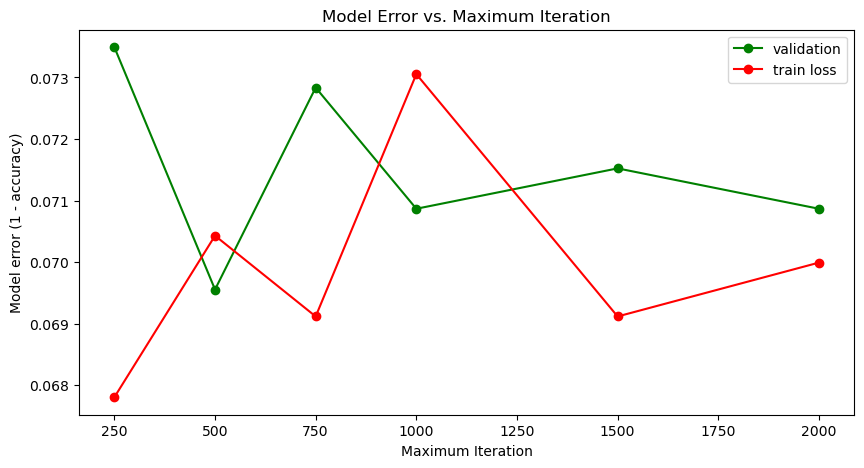

(6, 180)
(6, 180)


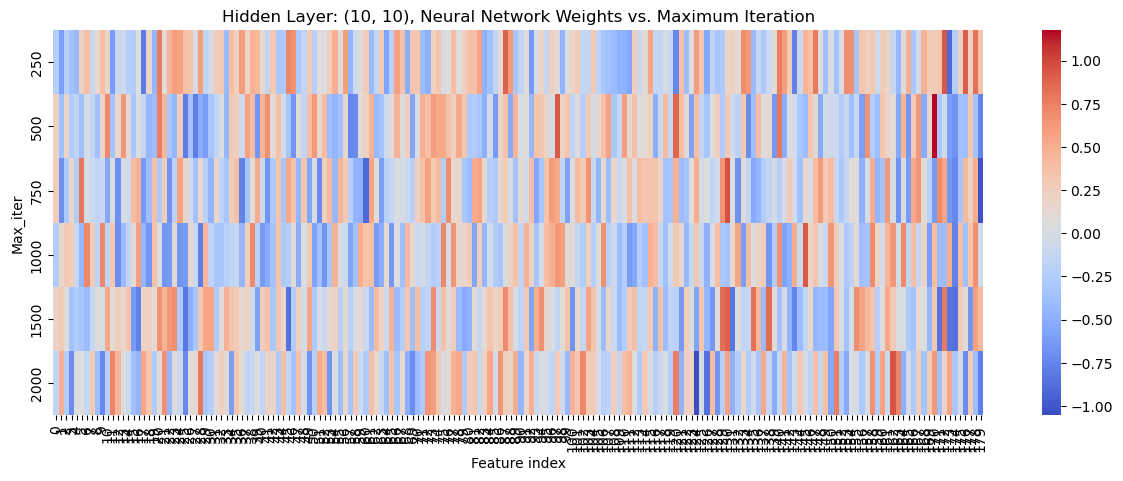

In [22]:
# hidden layer: (10, 10)
W_all = plot_nn_para_vs_error_weights((10, 10), X_train_std, X_test_std)
w=[]
for weight in W_all:
    w_iter = []
    for lst in weight:
        for i in lst:
            w_iter.append(i)
    w.append(np.array(w_iter))
weights_array = np.array(w)
print(weights_array.shape)
weights_array = weights_array.reshape(len(max_iter), -1)
print(weights_array.shape)
plt.figure(figsize=(15, 5))
sns.heatmap(weights_array, annot=False, cmap='coolwarm', xticklabels=range(weights_array.shape[1]), yticklabels=max_iter)
plt.title('Hidden Layer: (10, 10), Neural Network Weights vs. Maximum Iteration')
plt.xlabel('Feature index')
plt.ylabel('Max_iter')
plt.show()

## Feature Transformation

In [23]:
poly = PolynomialFeatures(2)
X_tr_poly = poly.fit_transform(X_train_std) # transforms the training data
X_test_poly = poly.transform(X_test_std) # transforms the validation data

max iteration: 250
              precision    recall  f1-score   support

           0       0.94      0.89      0.91       675
           1       0.92      0.95      0.93       849

    accuracy                           0.93      1524
   macro avg       0.93      0.92      0.92      1524
weighted avg       0.93      0.93      0.93      1524

[[603  72]
 [ 41 808]]
training accuracy: 0.931758530183727
test accuracy: 0.9258530183727034 

[array([ 0.67404017, -0.35995358,  0.05332615,  0.34071564, -0.03370848,
        0.29858167, -0.0718778 , -0.2553343 ,  0.48093675,  0.08660797,
       -0.00622591,  0.36376851, -0.30954784,  0.08272054, -0.55837974,
        0.53750954,  0.47723818, -0.54951841,  0.18260676, -0.24619302,
        0.28714233, -0.18912866,  0.48840948,  0.00086479, -0.53361331,
       -0.01065064, -0.4726997 ,  0.59253991, -0.22078806, -0.54231175,
        0.18602065,  0.8496676 ,  0.17230921, -0.13256952,  0.09603384,
       -0.15163914,  0.26142041,  0.19702297, -0.4806

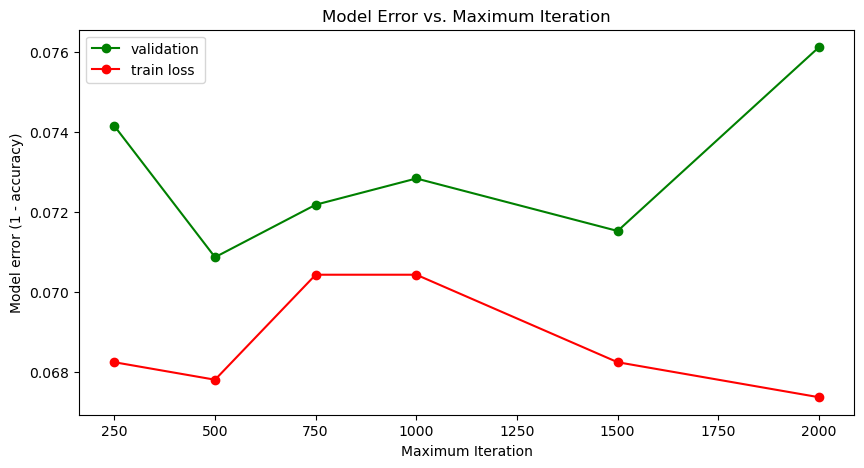

(6, 259)
(6, 259)


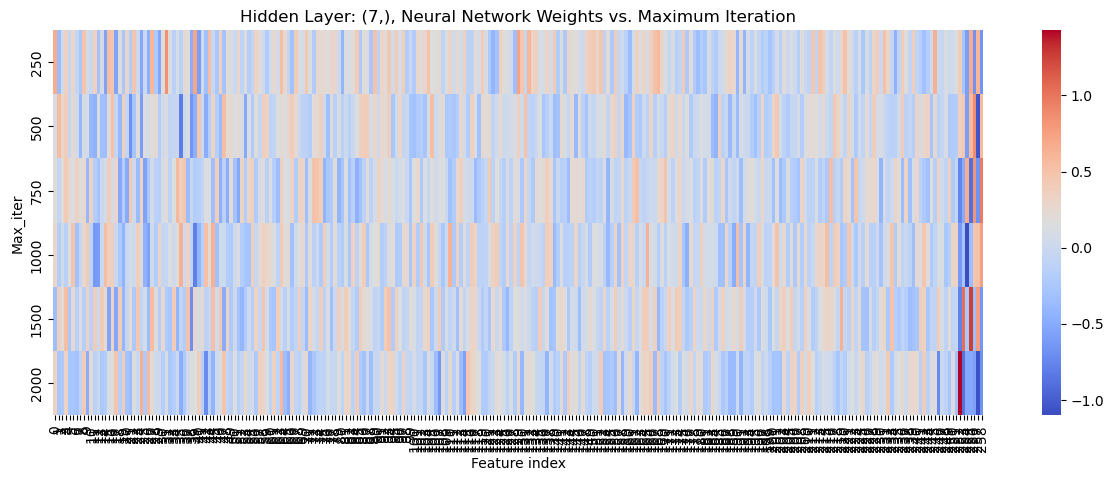

In [27]:
# hidden layer: (7,)
W_all = plot_nn_para_vs_error_weights((7,), X_tr_poly, X_test_poly)
w=[]
for weight in W_all:
    w_iter = []
    for lst in weight:
        for i in lst:
            w_iter.append(i)
    w.append(np.array(w_iter))
weights_array = np.array(w)
print(weights_array.shape)
weights_array = weights_array.reshape(len(max_iter), -1)
print(weights_array.shape)
plt.figure(figsize=(15, 5))
sns.heatmap(weights_array, annot=False, cmap='coolwarm', xticklabels=range(weights_array.shape[1]), yticklabels=max_iter)
plt.title('Hidden Layer: (7,), Neural Network Weights vs. Maximum Iteration')
plt.xlabel('Feature index')
plt.ylabel('Max_iter')
plt.show()


max iteration: 250
              precision    recall  f1-score   support

           0       0.94      0.89      0.91       675
           1       0.92      0.96      0.94       849

    accuracy                           0.93      1524
   macro avg       0.93      0.92      0.93      1524
weighted avg       0.93      0.93      0.93      1524

[[600  75]
 [ 37 812]]
training accuracy: 0.931758530183727
test accuracy: 0.926509186351706 

[array([-0.29744213,  0.01174356,  0.83631159,  0.52209416, -0.13200149,
       -0.09037093, -0.22363379, -0.05186919,  0.01886491,  0.0945844 ,
        0.22696781, -0.15684381, -0.07936201, -0.21268007,  0.52041806,
       -0.07988707, -0.04399031,  0.1789407 ,  0.15281321,  0.30822341,
        0.150959  ,  0.42184573, -0.04816015, -0.50515328,  0.59626202,
        0.06418341,  0.09666232, -0.13924081, -0.17475642,  0.27279454,
       -0.04875664, -0.10535237, -0.68475506, -0.31718508,  0.11606398,
        0.39426263, -0.12058294,  0.00739276,  0.05228

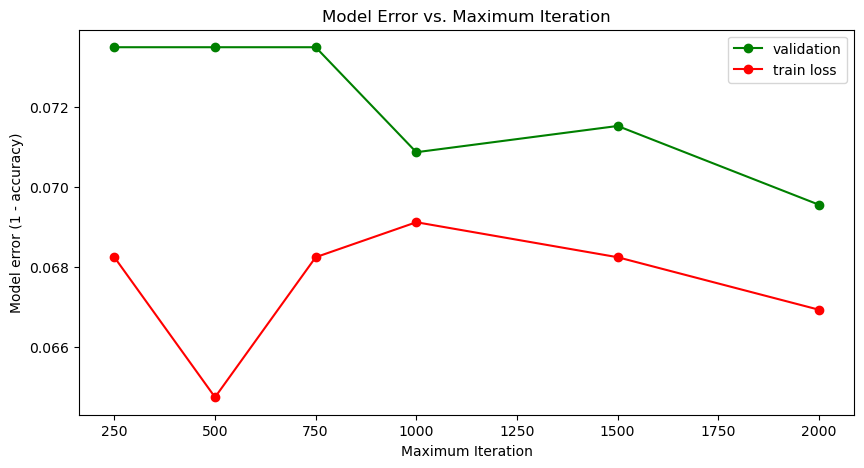

(6, 370)
(6, 370)


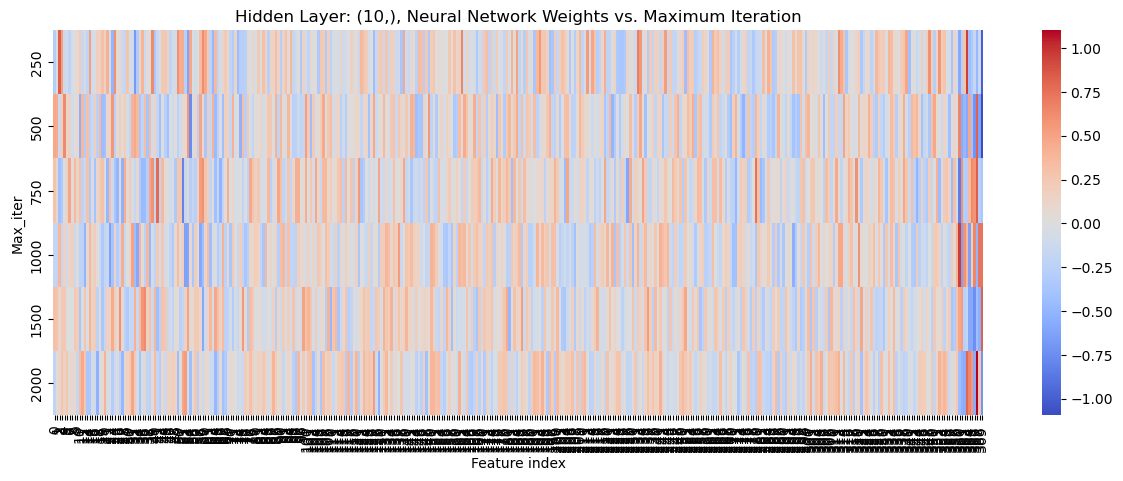

In [28]:
# hidden layer: (10,)
W_all = plot_nn_para_vs_error_weights((10,), X_tr_poly, X_test_poly)
w=[]
for weight in W_all:
    w_iter = []
    for lst in weight:
        for i in lst:
            w_iter.append(i)
    w.append(np.array(w_iter))
weights_array = np.array(w)
print(weights_array.shape)
weights_array = weights_array.reshape(len(max_iter), -1)
print(weights_array.shape)
plt.figure(figsize=(15, 5))
sns.heatmap(weights_array, annot=False, cmap='coolwarm', xticklabels=range(weights_array.shape[1]), yticklabels=max_iter)
plt.title('Hidden Layer: (10,), Neural Network Weights vs. Maximum Iteration')
plt.xlabel('Feature index')
plt.ylabel('Max_iter')
plt.show()

max iteration: 250
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       675
           1       0.93      0.95      0.94       849

    accuracy                           0.93      1524
   macro avg       0.93      0.93      0.93      1524
weighted avg       0.93      0.93      0.93      1524

[[610  65]
 [ 41 808]]
training accuracy: 0.9313210848643919
test accuracy: 0.9304461942257218 

[array([ 0.21652348,  0.43748281,  0.03660155,  0.49670979,  0.37812978,
       -0.05627489,  0.37480481,  0.24056505, -0.1919656 , -0.06584129,
       -0.21481486,  0.11043056, -0.06358211,  0.12427673, -0.27532324,
        0.01633025, -0.09103848, -0.28513265,  0.26162302, -0.06105958,
        0.18958224,  0.2257831 ,  0.24314251, -0.34726345,  0.14054406,
       -0.40718829, -0.23727985, -0.08652288, -0.21884983, -0.08937041,
        0.0819552 ,  0.13730244,  0.38250813,  0.28429059,  0.29045079,
        0.09742885, -0.17388276,  0.08962767, -0.019

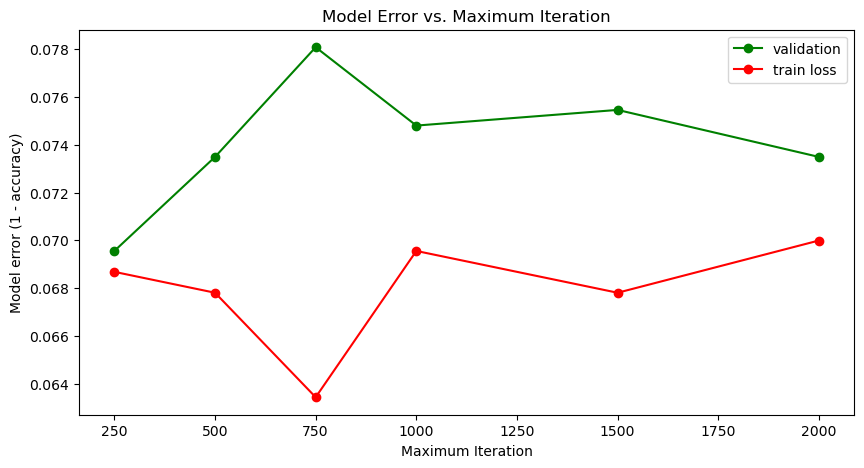

(6, 470)
(6, 470)


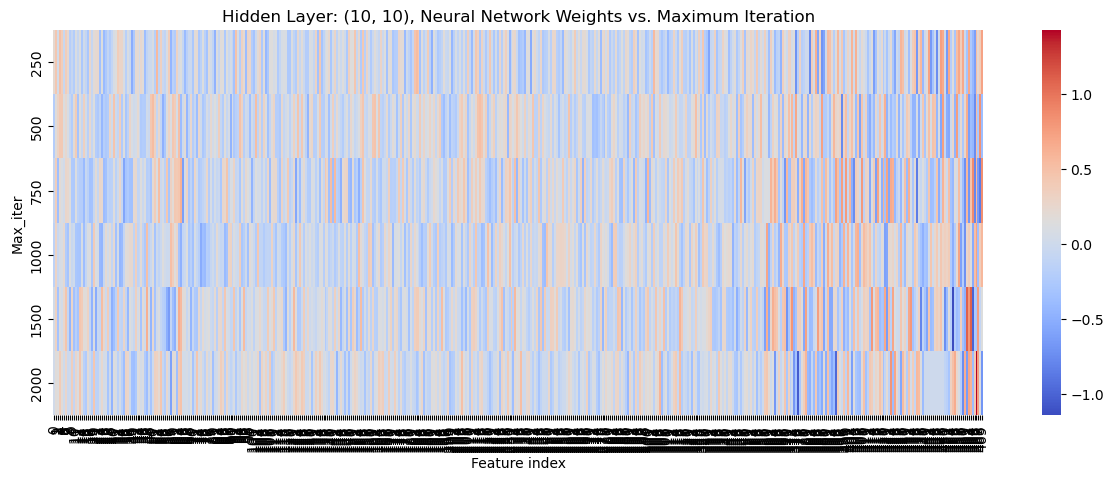

In [29]:
# hidden layer: (10, 10)
W_all = plot_nn_para_vs_error_weights((10, 10), X_tr_poly, X_test_poly)
w=[]
for weight in W_all:
    w_iter = []
    for lst in weight:
        for i in lst:
            w_iter.append(i)
    w.append(np.array(w_iter))
weights_array = np.array(w)
print(weights_array.shape)
weights_array = weights_array.reshape(len(max_iter), -1)
print(weights_array.shape)
plt.figure(figsize=(15, 5))
sns.heatmap(weights_array, annot=False, cmap='coolwarm', xticklabels=range(weights_array.shape[1]), yticklabels=max_iter)
plt.title('Hidden Layer: (10, 10), Neural Network Weights vs. Maximum Iteration')
plt.xlabel('Feature index')
plt.ylabel('Max_iter')
plt.show()